In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, \
        ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# Importing standard libraries for ploting and doing math
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-17 00:52:43,258: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
# Set the number of registers for you quantum circuit
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')

# Initialize a list to hold all of the circuits you want to run at the same time
circuits = []
# List of the parameter you get to vary, 
# here it's chosing 5 angles evenly space from 0 to 2*pi
angles = np.linspace(0,2*pi,11) 

#list counting number of trials
trials = range(1) 

for angle in angles:
    # Copy in your code from the quantum composer here:
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.reset(qreg_q[0])
    circuit.h(qreg_q[0])
    circuit.rz(angle, qreg_q[0])
    circuit.h(qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    
    # Add the circuit to the list of circuits you would like to use 
    # Currently set up to add it multiple times if 
    for trial in trials:
        circuits.append(circuit)


In [ ]:
# Check to see how many circuits we've made (should be number of angles * number of trials)
print(len(circuits))

11


In [ ]:
# Draw circuit diagram (Optional)
circuit_to_draw = circuits[0] # Selecting the first circuit in the list, 
                              # you can change the 0 to look at other circuits

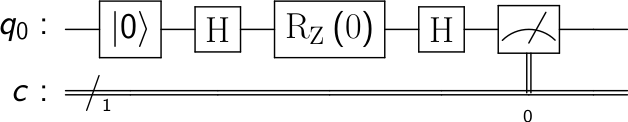

In [ ]:
# See the circuit as a picture here (can take a couple minutes)
circuit_to_draw.draw(output='latex')

In [ ]:
# Print out the source code to copy into the paper
source_code = circuit_to_draw.draw(output='latex_source')
print(source_code)

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 2, img_depth = 7
\usepackage[size=custom,height=10,width=18,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}

\begin{equation*}
    \Qcircuit @C=1.0em @R=0.2em @!R {
	 	\lstick{ {q}_{0} :  } & \gate{\left|0\right\rangle} & \gate{\mathrm{H}} & \gate{\mathrm{R}_\mathrm{Z}\,\mathrm{(}\mathrm{0}\mathrm{)}} & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\lstick{c:} & \lstick{/_{_{1}}} \cw & \cw & \cw & \cw & \dstick{_{_{0}}} \cw \cwx[-1] & \cw & \cw\\
	 }
\end{equation*}

\end{document}


In [ ]:
# Set up connection to quantum computer. 
# You might want to check in the circuit developer which one is the best to use/ not too busy
# Higher quantum volume may mean that it matches your predictions better, but is more busy
device_backend = provider.get_backend('ibmq_belem') #5 qubits, 16 Quantum volume
# Set the number of shots:
device_shots = 1024

In [ ]:
# Run all your circuits on the quantum computer!
## backend = device name, shots = number of shots
## memory = True means that you remeber all data points in order (not just counts)
job = execute(circuits, backend=device_backend, shots=device_shots,optimization_level=3,memory=True)
# Keep an eye on where you are in the queue
job_monitor(job)
# Record the data from all circuits as a Result object
result = job.result()

Job Status: job has successfully run


In [ ]:
# Look here for everything you can do to a result: 
# https://qiskit.org/documentation/stubs/qiskit.result.Result.html#qiskit.result.Result

# For example: Extract the counts for each circuit
data_counts = [result.get_counts(i) for i in range(len(circuits))]
data_full = [result.get_memory(i) for i in range(len(circuits))]



In [ ]:
# look at wat counts looks like (it's a dictionary): 
data_counts[0]

{'0': 1016, '1': 8}

In [ ]:
# You can get the number zero counts like this: 
data_counts[0]['0']

1016

In [ ]:
Num_1s = [data_counts[i]['1'] for i in range(len(circuits))]

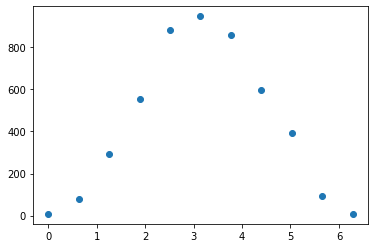

In [ ]:
plt.plot(angles,Num_1s,'o')